In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy import stats
import seaborn as sns
from textwrap import wrap
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading train and test dataset in pandas dataframe
train_df = pd.read_excel('train.xlsx')
test_df = pd.read_excel('test.xlsx')

In [3]:
# Concatinate train & test dataset
df = pd.concat([train_df,test_df], axis=0)

In [4]:
print("Dimension of the Data set is", df.shape)
print()
df.head()

Dimension of the Data set is (541909, 8)



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,558904,22292,HANGING CHICK YELLOW DECORATION,1,2011-07-04 16:18:00,1.25,NaN,United Kingdom
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541909 entries, 0 to 162572
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 37.2+ MB


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [7]:
# Checking all the records which were returned
df[df["InvoiceNo"].str.startswith('C',na=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
415,C549269,75049L,LARGE CIRCULAR MIRROR MOBILE,-9,2011-04-07 12:47:00,0.85,16701.0,United Kingdom
487,C572109,23064,CINDERELLA CHANDELIER,-1,2011-10-20 18:24:00,49.95,13350.0,United Kingdom
613,C537860,22180,RETROSPOT LAMP,-1,2010-12-08 16:15:00,9.95,16252.0,United Kingdom
834,C560540,23240,SET OF 4 KNICK KNACK TINS DOILEY,-1,2011-07-19 12:26:00,4.15,12415.0,Australia
874,C542910,20726,LUNCH BAG WOODLAND,-1,2011-02-01 15:38:00,1.45,17511.0,United Kingdom
...,...,...,...,...,...,...,...,...
162302,C558712,21735,TWO DOOR CURIO CABINET,-1,2011-07-01 13:06:00,12.75,17338.0,United Kingdom
162334,C550780,84507C,BLUE CIRCLES DESIGN MONKEY DOLL,-1,2011-04-20 13:39:00,2.55,17211.0,United Kingdom
162344,C553031,21533,RETROSPOT LARGE MILK JUG,-3,2011-05-12 19:43:00,4.95,13908.0,United Kingdom
162421,C542910,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-1,2011-02-01 15:38:00,2.55,17511.0,United Kingdom


In [8]:
# Deleting all the records which were returned 
df=df[~df['InvoiceNo'].str.startswith('C',na=False)]

In [9]:
df.shape

(532621, 8)

In [10]:
# Checking for missing values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     134697
Country             0
dtype: int64

In [11]:
# Deleting all the missing values
df = df[pd.notnull(df['CustomerID'])]

In [12]:
# Creating a new column Total Sales 
df['Total_sales'] = df['Quantity'] * df['UnitPrice']

In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Quantity,397924.0,13.021823,180.420210,1.0,2.00,6.00,12.00,80995.00
UnitPrice,397924.0,3.116174,22.096788,0.0,1.25,1.95,3.75,8142.75
CustomerID,397924.0,15294.315171,1713.169877,12346.0,13969.00,15159.00,16795.00,18287.00
Total_sales,397924.0,22.394749,309.055588,0.0,4.68,11.80,19.80,168469.60


In [14]:
df[(df['Quantity'] > 500) & (df['Total_sales'] > 1000)].head(14)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_sales
440,548011,22630,DOLLY GIRL LUNCH BOX,640,2011-03-29 11:14:00,1.65,14646.0,Netherlands,1056.00
4766,570094,22273,FELTCRAFT DOLL MOLLY,720,2011-10-07 11:56:00,2.55,16029.0,United Kingdom,1836.00
6586,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-01-11 12:55:00,2.10,15749.0,United Kingdom,6539.40
9074,536809,84950,ASSORTED COLOUR T-LIGHT HOLDER,1824,2010-12-02 16:48:00,0.55,15299.0,United Kingdom,1003.20
14761,567423,23285,PINK VINTAGE SPOT BEAKER,1944,2011-09-20 11:05:00,1.08,17450.0,United Kingdom,2099.52
15029,554845,85123A,WHITE HANGING HEART T-LIGHT HOLDER,608,2011-05-26 19:49:00,3.24,17450.0,United Kingdom,1969.92
15177,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901.0,United Kingdom,1008.00
17773,574294,22086,PAPER CHAIN KIT 50'S CHRISTMAS,1020,2011-11-03 15:47:00,2.55,16333.0,United Kingdom,2601.00
30612,558526,23170,REGENCY TEA PLATE ROSES,720,2011-06-30 11:01:00,1.45,17949.0,United Kingdom,1044.00
36091,558554,23245,SET OF 3 REGENCY CAKE TINS,576,2011-06-30 12:50:00,4.15,17949.0,United Kingdom,2390.40


In [15]:
# Deleting record for Inovice no. 581483
df.drop(43525, axis =0, inplace = True)

In [16]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Quantity,397922.0,12.818334,126.770315,1.0,2.00,6.00,12.00,74215.00
UnitPrice,397922.0,3.116180,22.096843,0.0,1.25,1.95,3.75,8142.75
CustomerID,397922.0,15294.310475,1713.172833,12346.0,13969.00,15159.00,16795.00,18287.00
Total_sales,397922.0,21.971467,155.592056,0.0,4.68,11.80,19.80,77183.60


In [17]:
df[df['Quantity'] == 74215]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_sales
322892,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6


In [18]:
# Removing the record for invoice number 541431
df.drop(322892, axis =0, inplace = True)

In [19]:
orders_n = df.groupby(['CustomerID']) ['InvoiceNo'].nunique()
more_than_one = np.sum(orders_n > 1) / df['CustomerID'].nunique()
print(f'{100 * more_than_one:.2f}% of customers ordered more than once')

65.56% of customers ordered more than once


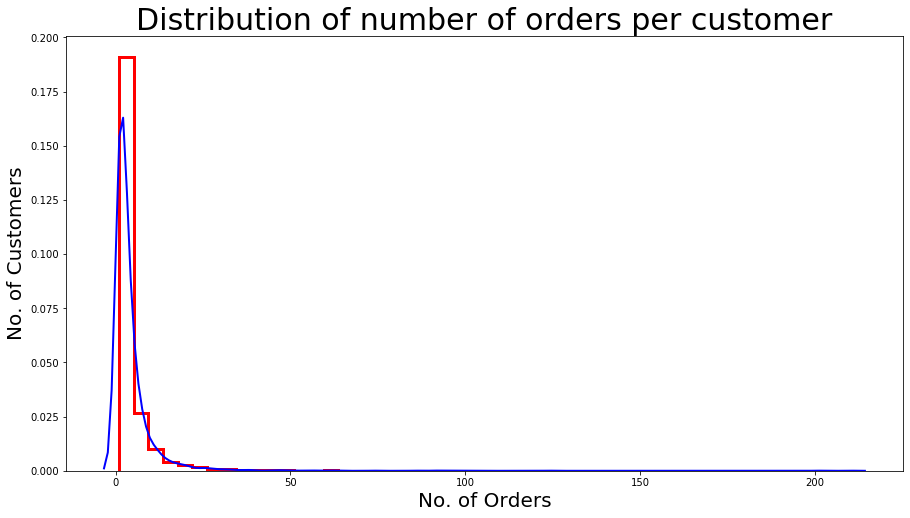

In [20]:
plt.figure(figsize=(15,8))
plt.style.use('_classic_test_patch')
px = sns.distplot(orders_n, hist = True, rug_kws={"color": "r"},
                  kde_kws={"color": "b", "lw": 2, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "r"})

px.set_title('Distribution of number of orders per customer', fontsize = 30)
px.set_xlabel('No. of Orders', fontsize = 20)
px.set_ylabel('No. of Customers', fontsize = 20);

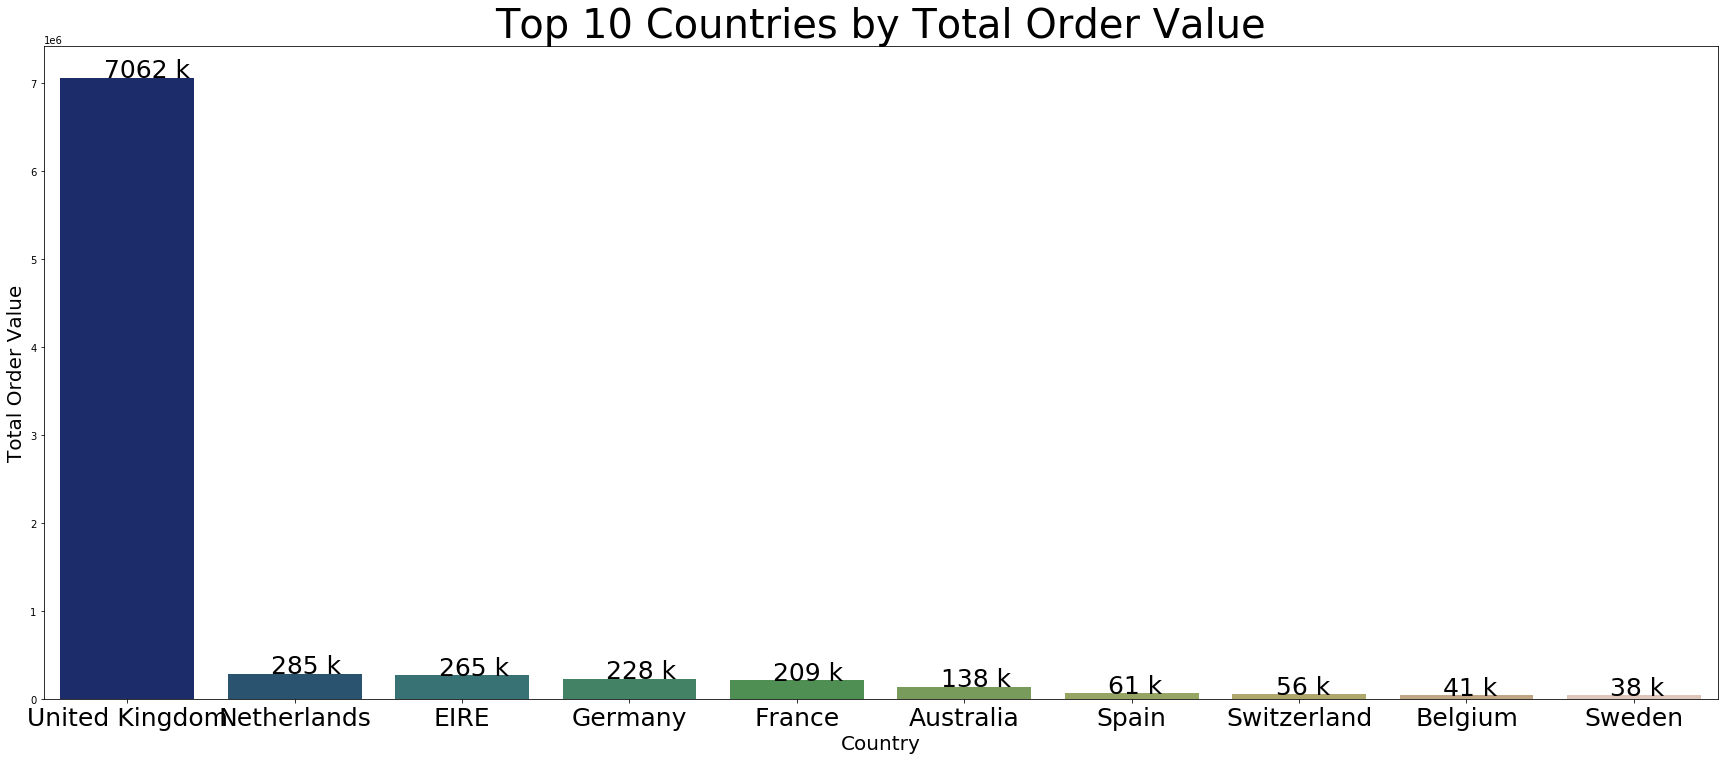

In [21]:
order_country = df.groupby('Country').sum()['Total_sales'].nlargest(10)
plt.figure(figsize=(30,12))
plt.style.use('_classic_test_patch')
px = sns.barplot(x = order_country.index, y = order_country.values, palette = 'gist_earth')
px.set_xlabel('Country', fontsize = 20)
px.set_ylabel('Total Order Value', fontsize = 20)
px.set_title('Top 10 Countries by Total Order Value', fontsize = 40)

labels = [ '\n'.join(wrap(l, 15)) for l in order_country.index ]
px.set_xticklabels(labels, fontsize = 25)

value_ticks = []
for x in order_country.values:
    value_ticks.append(str(int(x/1000))+' k')
value_ticks[0]

for a, label in zip(px.patches, value_ticks):
    px.annotate(label, (a.get_x() + 0.26, a.get_height() + 2), fontsize = 25)

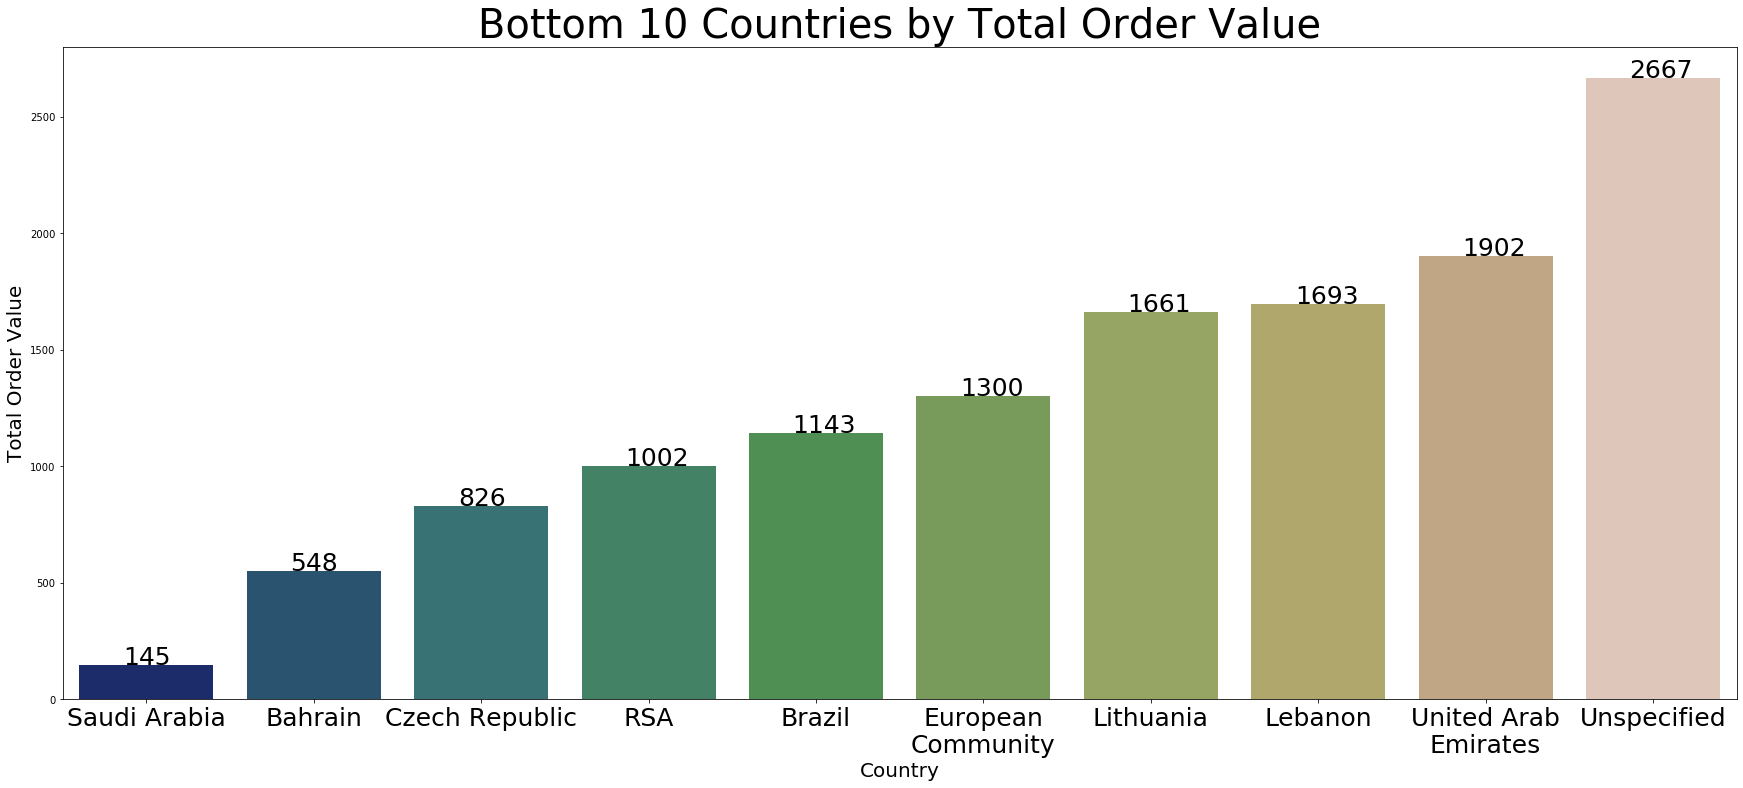

In [22]:
order_country = df.groupby('Country').sum()['Total_sales'].nsmallest(10)
plt.figure(figsize=(30,12))
plt.style.use('_classic_test_patch')
px = sns.barplot(x = order_country.index, y = order_country.values, palette = 'gist_earth')
px.set_xlabel('Country', fontsize = 20)
px.set_ylabel('Total Order Value', fontsize = 20)
px.set_title('Bottom 10 Countries by Total Order Value', fontsize = 40)

labels = [ '\n'.join(wrap(l, 15)) for l in order_country.index ]
px.set_xticklabels(labels, fontsize = 25)

value_ticks = []
for x in order_country.values:
    value_ticks.append(str(int(x)))
value_ticks[0]

for a, label in zip(px.patches, value_ticks):
    px.annotate(label, (a.get_x() + 0.26, a.get_height() + 2), fontsize = 25)

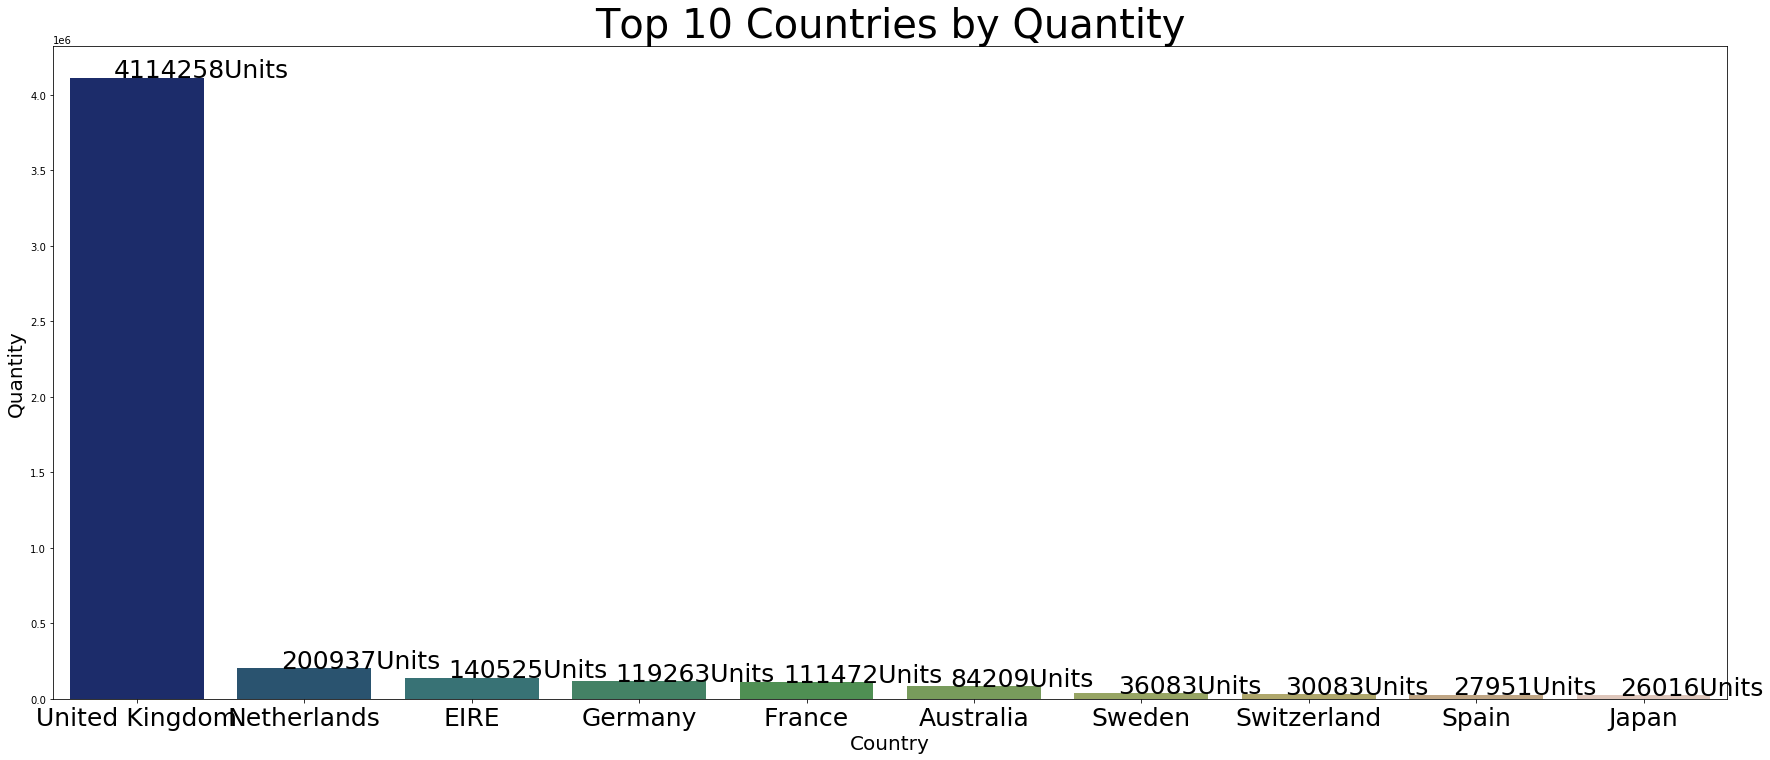

In [23]:
order_country = df['Quantity'].groupby(df['Country']).agg('sum').sort_values(ascending=False).head(10)
plt.figure(figsize=(30,12))
plt.style.use('_classic_test_patch')
px = sns.barplot(x = order_country.index, y = order_country.values, palette = 'gist_earth')
px.set_xlabel('Country', fontsize = 20)
px.set_ylabel('Quantity', fontsize = 20)
px.set_title('Top 10 Countries by Quantity', fontsize = 40)

labels = [ '\n'.join(wrap(l, 15)) for l in order_country.index ]
px.set_xticklabels(labels, fontsize = 25)

value_ticks = []
for x in order_country.values:
    value_ticks.append(str(int(x))+'Units')
value_ticks[0]

for a, label in zip(px.patches, value_ticks):
    px.annotate(label, (a.get_x() + 0.26, a.get_height() + 2), fontsize = 25)

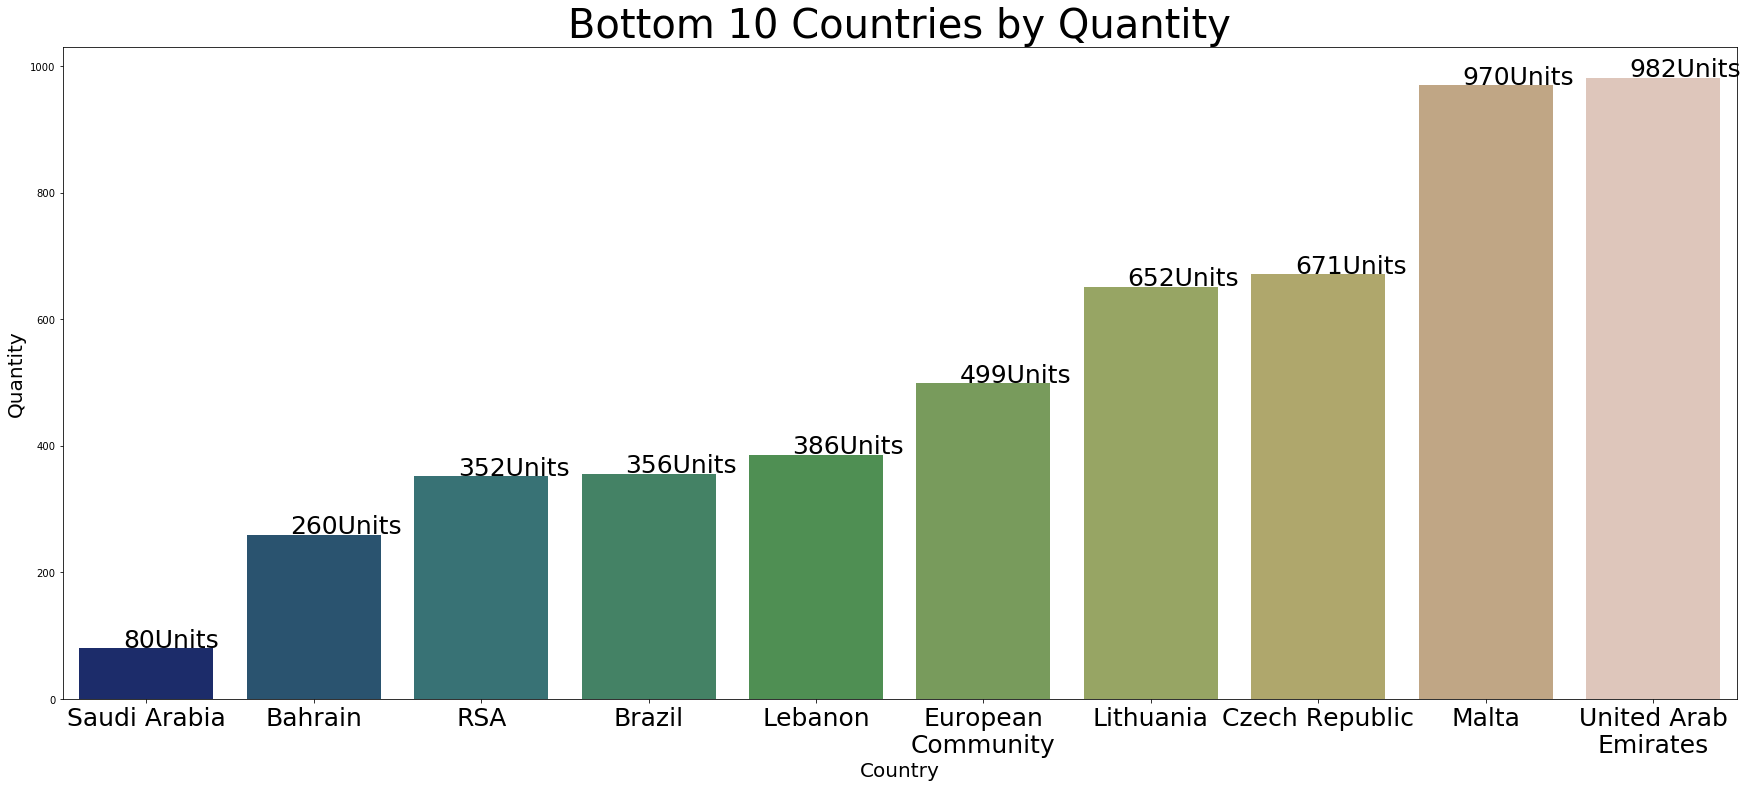

In [24]:
order_country = df['Quantity'].groupby(df['Country']).agg('sum').sort_values(ascending=True).head(10)
plt.figure(figsize=(30,12))
plt.style.use('_classic_test_patch')
px = sns.barplot(x = order_country.index, y = order_country.values, palette = 'gist_earth')
px.set_xlabel('Country', fontsize = 20)
px.set_ylabel('Quantity', fontsize = 20)
px.set_title('Bottom 10 Countries by Quantity', fontsize = 40)

labels = [ '\n'.join(wrap(l, 15)) for l in order_country.index ]
px.set_xticklabels(labels, fontsize = 25)

value_ticks = []
for x in order_country.values:
    value_ticks.append(str(int(x))+'Units')
value_ticks[0]

for a, label in zip(px.patches, value_ticks):
    px.annotate(label, (a.get_x() + 0.26, a.get_height() + 2), fontsize = 25)

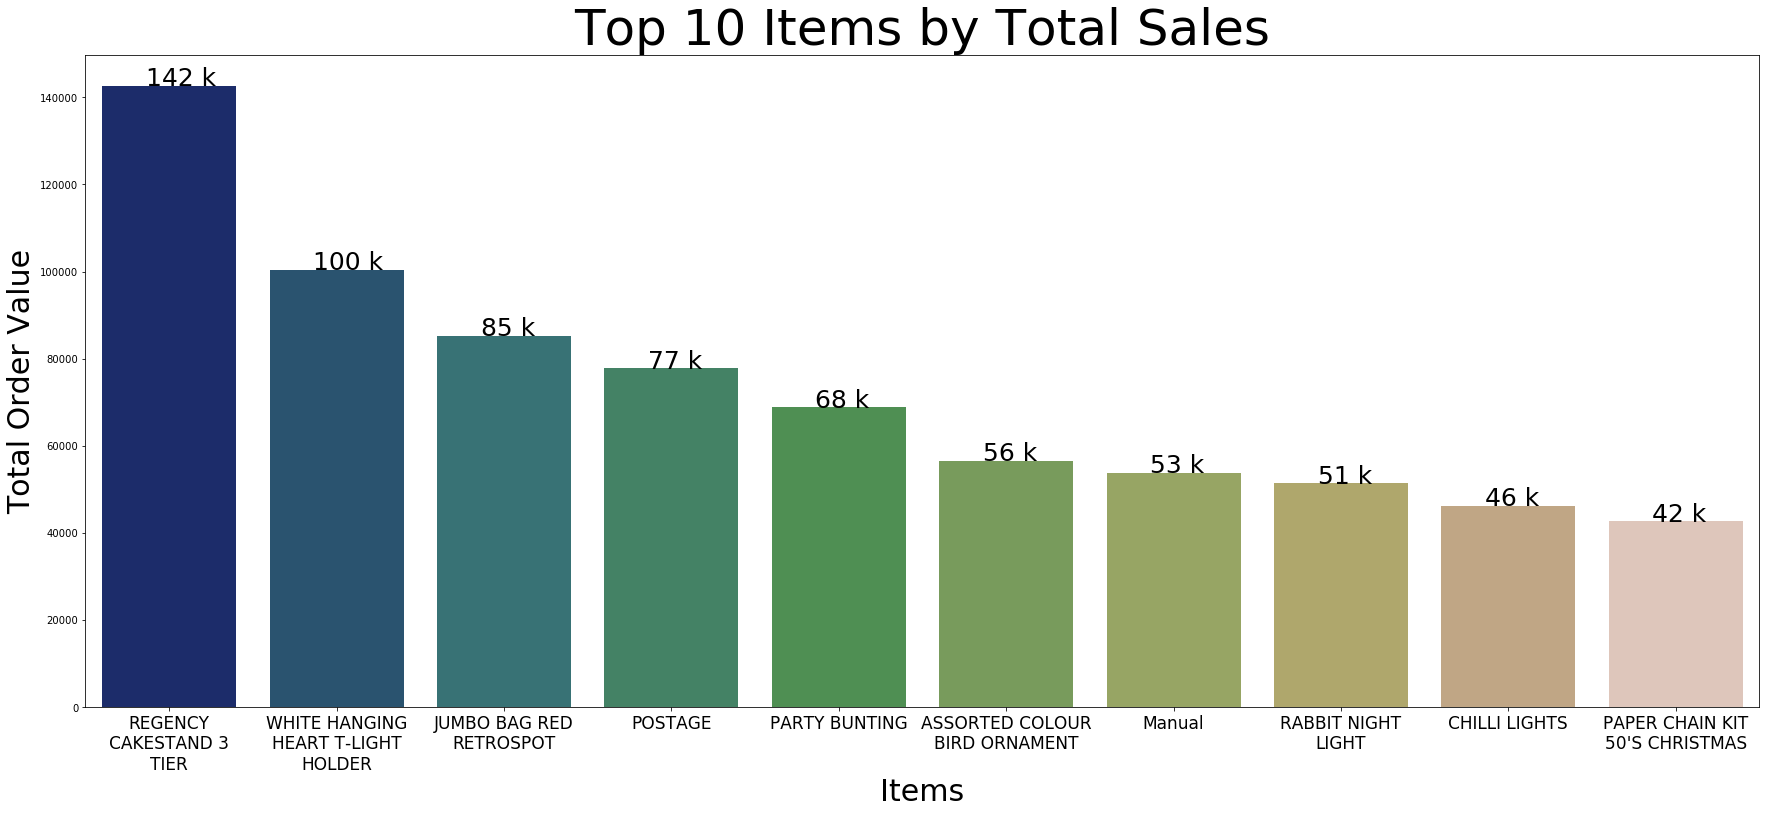

In [25]:
#Total order value by country's

sales_items = df.groupby('Description').sum()['Total_sales'].nlargest(10)
plt.figure(figsize=(30,12))
plt.style.use('_classic_test_patch')
px = sns.barplot(x = sales_items.index, y = sales_items.values, palette = 'gist_earth')
px.set_xlabel('Items', fontsize = 30)
px.set_ylabel('Total Order Value', fontsize = 30)
px.set_title('Top 10 Items by Total Sales', fontsize = 50)

labels_x = [ '\n'.join(wrap(l, 15)) for l in sales_items.index ]
px.set_xticklabels(labels_x, fontsize = 17)

value_ticks = []
for x in sales_items.values:
    value_ticks.append(str(int(x/1000))+' k')

for a, label in zip(px.patches, value_ticks):
    px.annotate(label, (a.get_x() + 0.26, a.get_height() + 2), fontsize = 25)

In [26]:
#Cohort Analysis

In [27]:
# Creating a copy of the cleaned data
df_cohort = df.copy()

In [28]:
# As we have only 9 days information of December 2011, so we would not use that for cohort analysis.
df_cohort = df_cohort[~(df_cohort['InvoiceDate'] > '2011-12-01')]

In [29]:
# Extracting month and year column from the Invoice date column
df_cohort['invoice_month'] = df_cohort['InvoiceDate'].apply(lambda x: x.strftime('%Y-%m'))

In [30]:
month_grp = df_cohort.groupby('invoice_month')

month_grp_agg = month_grp.agg({'CustomerID': pd.Series.nunique, 'Description': pd.Series.nunique, 
                               'Quantity': np.sum, 'Total_sales': np.sum})

month_grp_agg.rename(columns ={'CustomerID':'# customers', 'Description':'tot_item_types',}, inplace = True)

month_grp_agg

,# customers,tot_item_types,Quantity,Total_sales
invoice_month,,,,
2010-12,885,2418,312276,572705.490
2011-01,740,2117,274932,492261.440
2011-02,758,2122,265638,447137.350
2011-03,974,2240,348544,595500.760
2011-04,856,2225,292225,469200.361
2011-05,1056,2255,373685,678594.560
2011-06,991,2361,363699,661213.690
2011-07,949,2373,369432,600091.011
2011-08,935,2386,398938,645343.900


In [31]:
#Creating Label for customer cohort
df_cohort.set_index('CustomerID', inplace = True)
df_cohort.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Total_sales,invoice_month
CustomerID,,,,,,,,,
16126.0,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,United Kingdom,30.00,2011-06
18118.0,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,United Kingdom,5.10,2011-05
15529.0,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,United Kingdom,0.85,2011-01
14448.0,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,United Kingdom,19.50,2010-12
13911.0,552306,84789,ENCHANTED BIRD PLANT CAGE,4,2011-05-08 15:20:00,3.75,United Kingdom,15.00,2011-05


In [32]:
df_cohort['cust_cohort'] = df_cohort.groupby(level=0)['InvoiceDate'].min().apply(lambda x: x.strftime('%Y-%m'))
df_cohort.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Total_sales,invoice_month,cust_cohort
CustomerID,,,,,,,,,,
16126.0,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,United Kingdom,30.00,2011-06,2011-02
18118.0,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,United Kingdom,5.10,2011-05,2010-12
15529.0,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,United Kingdom,0.85,2011-01,2010-12
14448.0,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,United Kingdom,19.50,2010-12,2010-12
13911.0,552306,84789,ENCHANTED BIRD PLANT CAGE,4,2011-05-08 15:20:00,3.75,United Kingdom,15.00,2011-05,2011-02


In [33]:
df_cohort.reset_index(inplace = True)
df_cohort.head()

,CustomerID,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Total_sales,invoice_month,cust_cohort
0,16126.0,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,United Kingdom,30.00,2011-06,2011-02
1,18118.0,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,United Kingdom,5.10,2011-05,2010-12
2,15529.0,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,United Kingdom,0.85,2011-01,2010-12
3,14448.0,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,United Kingdom,19.50,2010-12,2010-12
4,13911.0,552306,84789,ENCHANTED BIRD PLANT CAGE,4,2011-05-08 15:20:00,3.75,United Kingdom,15.00,2011-05,2011-02


In [34]:
cust_grp = df_cohort.groupby(['cust_cohort','invoice_month'])

cust_grp_agg = cust_grp.agg({'CustomerID': pd.Series.nunique, 'Description': pd.Series.nunique,
                      'Quantity': np.sum, 'Total_sales': np.sum})

cust_grp_agg.rename(columns ={'CustomerID':'# customers', 'Description':'tot_item_types',}, inplace = True)

cust_grp_agg.head()

# customers  tot_item_types  Quantity  Total_sales
cust_cohort invoice_month                                                    
2010-12     2010-12                885            2418    312276    572705.49
            2011-01                324            1787    158708    276237.69
            2011-02                286            1697    136860    233845.37
            2011-03                340            1834    177580    303119.39
            2011-04                321            1781    131378    204407.66

In [35]:
def cohort_num(df_cohort):
    df_cohort['cohort_num'] = np.arange(len(df_cohort)) + 1
    return df_cohort

cust_grp_agg = cust_grp_agg.groupby(level=0).apply(cohort_num)
cust_grp_agg.head(10)


# customers  tot_item_types  Quantity  Total_sales  \
cust_cohort invoice_month                                                       
2010-12     2010-12                885            2418    312276    572705.49   
            2011-01                324            1787    158708    276237.69   
            2011-02                286            1697    136860    233845.37   
            2011-03                340            1834    177580    303119.39   
            2011-04                321            1781    131378    204407.66   
            2011-05                352            1851    178599    336627.50   
            2011-06                321            1871    178645    314162.61   
            2011-07                309            1954    177188    310783.92   
            2011-08                313            1952    207217    331749.22   
            2011-09                350            2138    250114    472813.64   

                           cohort_num  
cust_cohort invoice_month              
2010-12     2010-12                 1  
            2011-01                 2  
            2011-02                 3  
            2011-03                 4  
            2011-04                 5  
            2011-05                 6  
            2011-06                 7  
            2011-07                 8  
            2011-08                 9  
            2011-09                10

In [36]:
#Project Task 2
#Data Modelling

In [37]:
# Creating a copy of the original dataframe which will have records of December 2011 as well
rfm_df = df.copy(deep=True)

In [38]:
# Checking for duplicates
rfm_df.duplicated().sum()

5192

In [39]:
# Dropping all the duplicated records
rfm_df.drop_duplicates(inplace = True)

In [40]:
rfm_df.duplicated().sum()

0

In [41]:
rfm_df.shape

(392729, 9)

In [42]:
# The last transaction date we have is 12-09-2011, so we would take that as current date to calculate the recency
import datetime as dt
last_date = df['InvoiceDate'].max()

In [43]:
RFM_table = rfm_df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (last_date - x.max()).days, # Recency
                                        'InvoiceNo': 'count',               # Frequency
                                        'Total_sales': 'sum'})                # Monetary Value

RFM_table.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'Total_sales': 'Monetary'}, inplace=True)

RFM_table.head(10)

,Recency,Frequency,Monetary
CustomerID,,,
12347.0,1,182,4310.00
12348.0,74,31,1797.24
12349.0,18,73,1757.55
12350.0,309,17,334.40
12352.0,35,85,2506.04
12353.0,203,4,89.00
12354.0,231,58,1079.40
12355.0,213,13,459.40
12356.0,22,59,2811.43


In [44]:
RFM_table.reset_index(inplace = True)

In [45]:
quartiles = RFM_table.quantile(q=[0.25,0.50,0.75])
quartiles = quartiles.to_dict()

In [46]:
RFM_table_copy = RFM_table.copy()

In [47]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [48]:
RFM_table_copy['R'] = RFM_table_copy['Recency'].apply(RScore, args=('Recency',quartiles))
RFM_table_copy['F'] = RFM_table_copy['Frequency'].apply(FMScore, args=('Frequency',quartiles))
RFM_table_copy['M'] = RFM_table_copy['Monetary'].apply(FMScore, args=('Monetary',quartiles))

In [49]:
RFM_table_copy['RFM'] = RFM_table_copy.R.map(str)+RFM_table_copy.F.map(str)+RFM_table_copy.M.map(str)

In [50]:
RFM_table_copy['RFM_Score'] = RFM_table_copy[['R','F','M']].sum(axis=1)
RFM_table_copy.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM,RFM_Score
0,12347.0,1,182,4310.00,4,4,4,444,12
1,12348.0,74,31,1797.24,2,2,4,224,8
2,12349.0,18,73,1757.55,3,3,4,334,10
3,12350.0,309,17,334.40,1,1,2,112,4
4,12352.0,35,85,2506.04,3,3,4,334,10


In [51]:
RFM_table_copy.groupby('RFM_Score').agg({'Recency': 'mean','Frequency': 'mean', 'Monetary': ['mean', 'count'] }).round(1)

Recency Frequency Monetary      
             mean      mean     mean count
RFM_Score                                 
3           259.6       8.2    157.0   382
4           176.2      13.6    240.0   388
5           152.1      21.2    366.7   517
6            94.3      27.9    649.7   455
7            78.6      37.9    759.1   465
8            63.0      55.9    986.6   455
9            45.1      78.9   1391.5   413
10           31.5     110.6   2057.4   425
11           20.3     186.7   4055.8   388
12            6.2     367.9   9285.9   450

In [52]:
# Setting up the label for each client and adding the column "Label" to the dataframe

Segment = [0] * len(RFM_table_copy)

for i in range(0,len(RFM_table_copy)):

    if RFM_table_copy['RFM'][i] == '444':
        Segment[i] = "Platinum"
     
    elif RFM_table_copy['RFM'][i] == '413':
        Segment[i] = "Gold"
        
    elif RFM_table_copy['RFM'][i] == '323':
        Segment[i] = "Silver"    
        
    else:
        Segment[i] = "Bronze"

In [53]:
RFM_table_copy['Segment'] = Segment

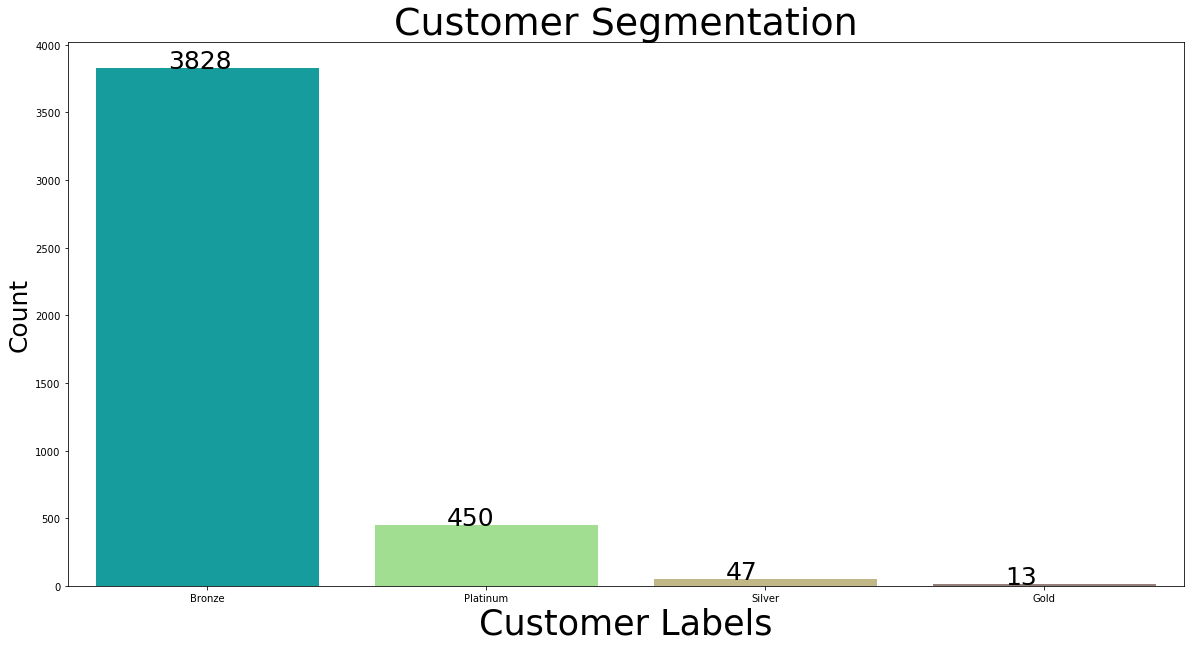

In [54]:
plt.figure(figsize=(20,10))
plt.style.use('_classic_test_patch')
ax = sns.countplot(x='Segment', data=RFM_table_copy, palette="terrain", order=RFM_table_copy['Segment'].value_counts().index[:5])
ax.set_ylabel('Count', fontsize = 25)
ax.set_xlabel('Customer Labels', fontsize = 35)
#ax.set_xticklabels(rfm_table['Label'].index, fontsize = 25)
ax.set_title('Customer Segmentation', fontsize = 38);

#labels_x = [ '\n'.join(wrap(l, 15)) for l in rfm_table['Label'].index ]
#ax.set_xticklabels(labels_x, fontsize = 19)

value_ticks = []
for x in RFM_table_copy['Segment'].value_counts():
    value_ticks.append(str(int(x)))

for a, label in zip(ax.patches, value_ticks):
    ax.annotate(label, (a.get_x() + 0.26, a.get_height() + 2), fontsize = 25)

In [55]:
RFM_table_copy.groupby('Segment').agg({'Recency':'mean', 'Frequency':'mean', 'Monetary':['mean','count']}).round(1)

Recency Frequency Monetary      
            mean      mean     mean count
Segment                                  
Bronze     102.5      58.9   1150.8  3828
Gold         9.4      11.9   1081.5    13
Platinum     6.2     367.9   9285.9   450
Silver      33.3      31.8    923.4    47

In [56]:
def skewness(df_skew, column):
    skew = stats.skew(df_skew[column])
    skewtest = stats.skewtest(df_skew[column])
    plt.title('Distribution of ' + column)
    sns.distplot(df_skew[column])
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return

Recency's: Skew: 1.2457125234954753, : SkewtestResult(statistic=26.608212114006275, pvalue=5.454166575151001e-156)
Frequency's: Skew: 18.036037104330713, : SkewtestResult(statistic=83.48256629177025, pvalue=0.0)
Monetary's: Skew: 20.624815446376232, : SkewtestResult(statistic=86.43722008800931, pvalue=0.0)


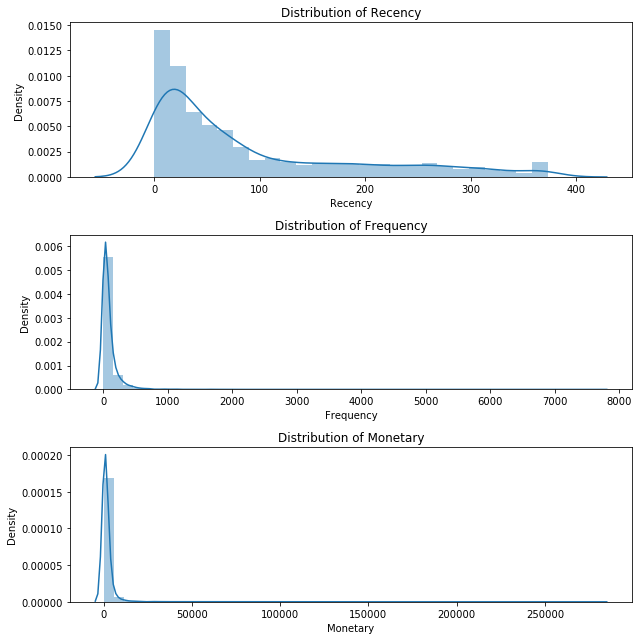

In [57]:
# Plot all 3 graphs together for summary findings
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
skewness(RFM_table_copy,'Recency')

plt.subplot(3, 1, 2)
skewness(RFM_table_copy,'Frequency')

plt.subplot(3, 1, 3)
skewness(RFM_table_copy,'Monetary')

plt.tight_layout()

In [58]:
#Project Task 3
#Data Modelling
#K-means Clustering

In [59]:
df_rfm_log = RFM_table.copy()
print(df_rfm_log.describe())

         CustomerID      Recency    Frequency       Monetary
count   4338.000000  4338.000000  4338.000000    4338.000000
mean   15300.617796    91.511757    90.532273    1992.057929
std     1721.503870    99.963616   225.537197    8546.651225
min    12347.000000     0.000000     1.000000       0.000000
25%    13813.250000    17.000000    17.000000     306.210000
50%    15299.500000    50.000000    41.000000     668.040000
75%    16778.750000   141.000000    98.000000    1656.537500
max    18287.000000   373.000000  7676.000000  280206.020000


Recency's: Skew: -0.553047774132005, : SkewtestResult(statistic=-13.947408787843337, pvalue=3.262444980776586e-44)
Frequency's: Skew: -0.012391467138597751, : SkewtestResult(statistic=-0.3337508666486869, pvalue=0.7385675621614818)
Monetary's: Skew: 0.3271118898101863, : SkewtestResult(statistic=8.59167125141112, pvalue=8.571333684337599e-18)


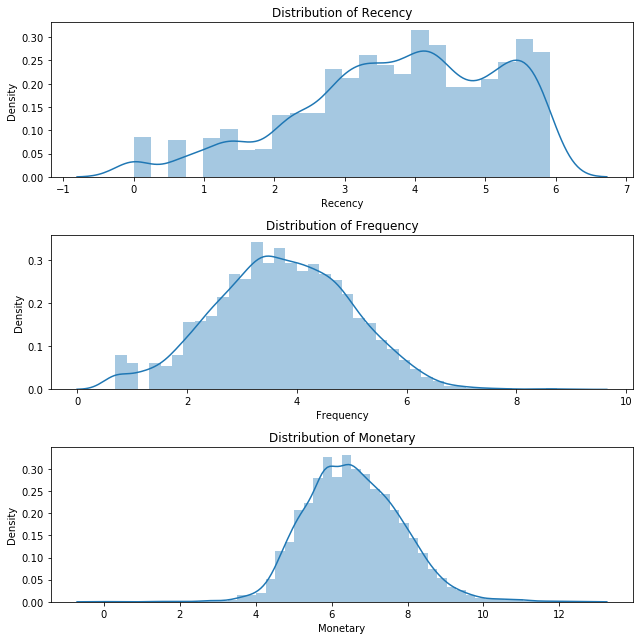

In [60]:
# A constant of 1 is added to the log to ensure we have all positive values
df_rfm_log = np.log(df_rfm_log+1)
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
skewness(df_rfm_log,'Recency')

plt.subplot(3, 1, 2)
skewness(df_rfm_log,'Frequency')

plt.subplot(3, 1, 3)
skewness(df_rfm_log,'Monetary')

plt.tight_layout()

In [61]:
print(df_rfm_log.describe())

        CustomerID      Recency    Frequency     Monetary
count  4338.000000  4338.000000  4338.000000  4338.000000
mean      9.629314     3.768036     3.729132     6.583507
std       0.113513     1.431272     1.245280     1.260195
min       9.421249     0.000000     0.693147     0.000000
25%       9.533456     2.890372     2.890372     5.727531
50%       9.635641     3.931826     3.737670     6.505844
75%       9.727928     4.955827     4.595120     7.413088
max       9.814000     5.924256     8.945984    12.543284


In [62]:
# Standardrizing the data
scaler = StandardScaler()
scaler.fit(df_rfm_log)

# Store it separately for clustering
rfm_scaled= scaler.transform(df_rfm_log)

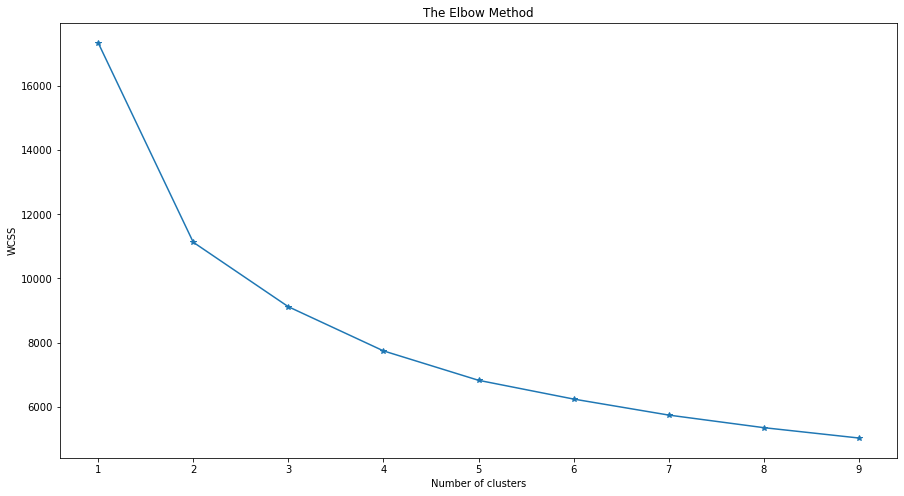

In [63]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

f, ax = plt.subplots(figsize=(15, 8))  
plt.style.use('_classic_test_patch')  
plt.plot(range(1, 10), wcss, '-*')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS');

In [64]:
def kmeans(rfm_scaled, clusters_number, original_df_rfm):
    
    kmeans = KMeans(n_clusters = clusters_number, random_state = 1)
    kmeans.fit(rfm_scaled)

    # Extract cluster labels
    cluster_labels = kmeans.labels_
        
    # Create a cluster label column in original dataset
    df_new = original_df_rfm.assign(Cluster = cluster_labels)
    
    # Initialise TSNE
    model = TSNE(random_state=1)
    transformed = model.fit_transform(df_new)
    
    # Plot t-SNE
    plt.title('Flattened Graph of {} Clusters'.format(clusters_number))
    sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette="Set1")
    
    return df_new

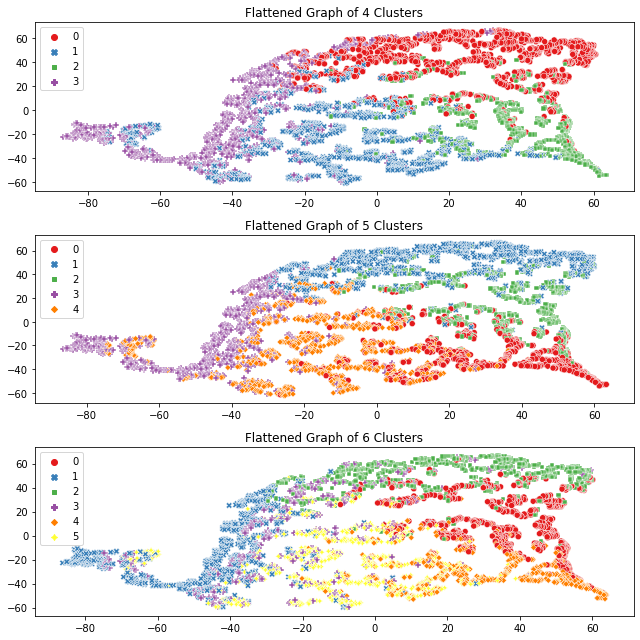

In [65]:
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
df_rfm_k4 = kmeans(rfm_scaled, 4, RFM_table)

plt.subplot(3, 1, 2)
df_rfm_k5 = kmeans(rfm_scaled, 5, RFM_table)

plt.subplot(3, 1, 3)
df_rfm_k6 = kmeans(rfm_scaled, 6, RFM_table)

plt.tight_layout()

In [66]:
def wire_plot(rfm_scaled, df_rfm_kmeans, df_rfm_original):

    rfm_scaled = pd.DataFrame(rfm_scaled, 
                                       index=RFM_table.index, 
                                       columns=RFM_table.columns)
    rfm_scaled['Cluster'] = df_rfm_kmeans['Cluster']

    # Melt data into long format
    df_melt = pd.melt(rfm_scaled.reset_index(), 
                        id_vars=['CustomerID', 'Cluster'],
                        value_vars=['Recency', 'Frequency', 'Monetary'], 
                        var_name='Metric', 
                        value_name='Value')

    plt.xlabel('Metric')
    plt.ylabel('Value')
    sns.pointplot(data=df_melt, x='Metric', y='Value', hue='Cluster')
    
    return

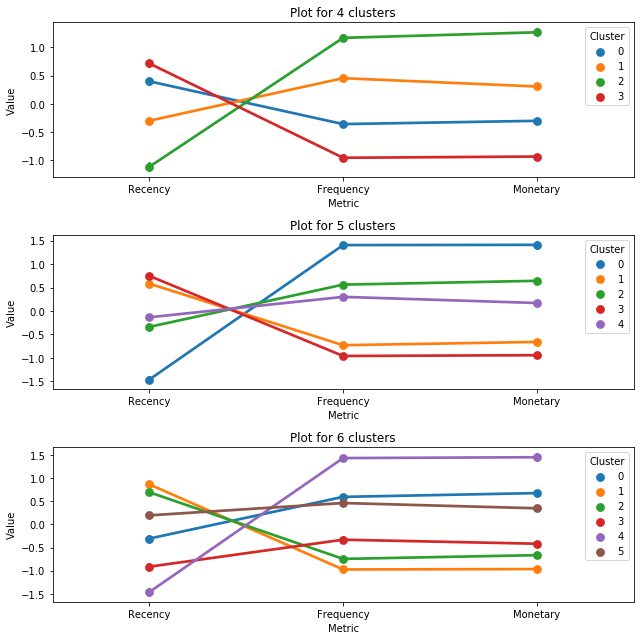

In [67]:
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
plt.title('Plot for 4 clusters')
wire_plot(rfm_scaled, df_rfm_k4, RFM_table)

plt.subplot(3, 1, 2)
plt.title('Plot for 5 clusters')
wire_plot(rfm_scaled, df_rfm_k5, RFM_table)

plt.subplot(3, 1, 3)
plt.title('Plot for 6 clusters')
wire_plot(rfm_scaled, df_rfm_k6, RFM_table)

plt.tight_layout()

In [68]:
# clustering
kc = KMeans(n_clusters= 4, random_state=42)
kc.fit(rfm_scaled)

#Create a cluster label column in the original DataFrame
cluster_labels = kc.labels_

#Calculate average RFM values and size for each cluster:
df_rfm_k4 = df_rfm_log.assign(K_Cluster = cluster_labels)

#Calculate average RFM values and sizes for each cluster:
df_rfm_k4.groupby('K_Cluster').agg({'Recency': 'mean','Frequency': 'mean',
                                         'Monetary': ['mean', 'count'],}).round(0)

Recency Frequency Monetary      
             mean      mean     mean count
K_Cluster                                 
0             4.0       3.0      6.0  1190
1             3.0       4.0      7.0  1195
2             5.0       3.0      5.0  1120
3             2.0       5.0      8.0   833

In [69]:
rfm_scaled = pd.DataFrame(rfm_scaled,index=RFM_table.index,columns=RFM_table.columns)
rfm_scaled['K_Cluster'] = kc.labels_
rfm_scaled['Segment'] = RFM_table_copy['Segment']
rfm_scaled['CustomerID'] = RFM_table_copy['CustomerID']
rfm_scaled.reset_index(inplace = True)

#Melt the data into a long format so RFM values and metric names are stored in 1 column each
rfm_melt = pd.melt(rfm_scaled,id_vars=['CustomerID','Segment','K_Cluster'],value_vars=['Recency', 'Frequency', 'Monetary'],
var_name='Metric',value_name='Value')
rfm_melt.head()

,CustomerID,Segment,K_Cluster,Metric,Value
0,12347.0,Platinum,3,Recency,-2.148608
1,12348.0,Bronze,0,Recency,0.383935
2,12349.0,Bronze,3,Recency,-0.575496
3,12350.0,Bronze,0,Recency,1.375533
4,12352.0,Bronze,3,Recency,-0.128933


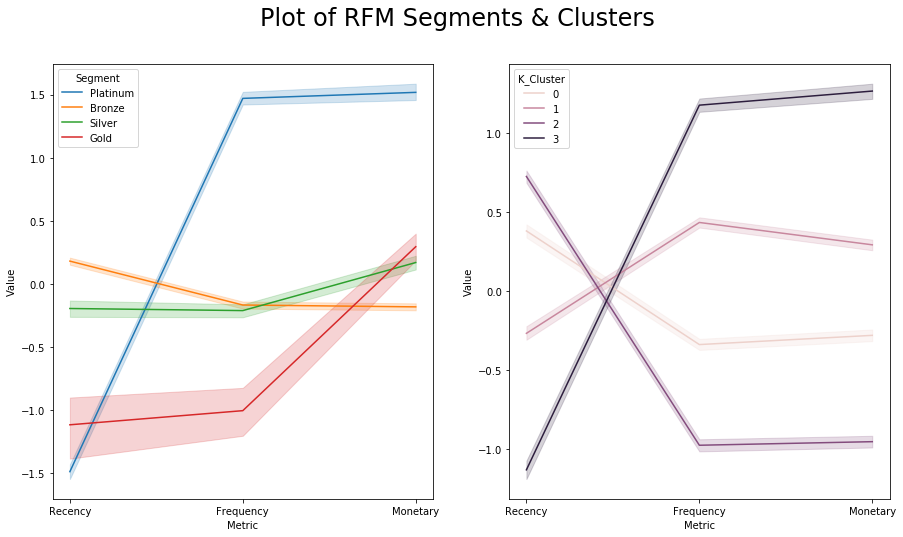

In [70]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 8))
sns.lineplot(x = 'Metric', y = 'Value', hue = 'Segment', data = rfm_melt,ax=ax1)

# a snake plot with K-Means
sns.lineplot(x = 'Metric', y = 'Value', hue = 'K_Cluster', data = rfm_melt,ax=ax2)

plt.suptitle("Plot of RFM Segments & Clusters",fontsize=24)
plt.show()